<a href="https://colab.research.google.com/github/watarutatsuda/ML-tutorial/blob/master/boston_property_pridict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ボストンの住宅価格を推定する機械学習

In [3]:
from sklearn import datasets
# ボストンの住宅価格のデータセットの読み込み
boston = datasets.load_boston()
# データセットの中身を見る
print(dir(boston))
# 詳細説明
print(boston.DESCR)

['DESCR', 'data', 'feature_names', 'filename', 'target']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-



```
CRIM: 人口 1 人当たりの犯罪発生数
ZN: 25,000 平方フィート以上の住居区画の占める割合
INDUS: 小売業以外の商業が占める面積の割合
CHAS: チャールズ川によるダミー変数 (1: 川の周辺, 0: それ以外)
NOX: NOX の濃度
RM: 住居の平均部屋数
AGE: 1940 年より前に建てられた物件の割合
DIS: 5 つのボストン市の雇用施設からの距離
RAD: 環状高速道路へのアクセスしやすさ
TAX: $10,000 ドルあたりの不動産税率の総計
PTRATIO: 町毎の児童と教師の比率
B: 町毎の黒人 (Bk) の比率を次の式で表したもの。 1000(Bk – 0.63)^2
LSTAT: 給与の低い職業に従事する人口の割合 (%)
MEDV: $1000ドルの持ち家数の中央値
```



In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# matplotlibをJupyter Notebookで使う際に記述するやつ

X = boston.data   # 説明変数
y = boston.target # 目的変数

df_X = pd.DataFrame(X)
df_y = pd.DataFrame(y)
df_X.columns = boston.feature_names
df_y.columns = ["target"]

In [7]:
# データフレームを確認
# head()で上から5行取り出す
df_X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
df_y.head()

,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [9]:
# 変数同士を結合する
df = pd.concat([df_X, df_y], axis = 1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
corr = df.corr()
# 相関行列を算出し、出力する
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [11]:
# LSTATと相関が大きいので単回帰を行う
# pandasのlocでLSTATの列を取得
lstat = df_X.loc[:,"LSTAT"]

print("変換前のデータ型は", type(lstat))
print("変換前の配列の大きさは", lstat.shape)
# numpyの配列に変換
lstat = lstat.values
# 二次元ベクトルに変形
lstat = lstat.reshape(-1,1)
print("変換後のデータ型は", type(lstat))
print("変換後の配列の大きさは", lstat.shape)

変換前のデータ型は <class 'pandas.core.series.Series'>
変換前の配列の大きさは (506,)
変換後のデータ型は <class 'numpy.ndarray'>
変換後の配列の大きさは (506, 1)


散布図で説明変数と目的変数の関係性を可視化する

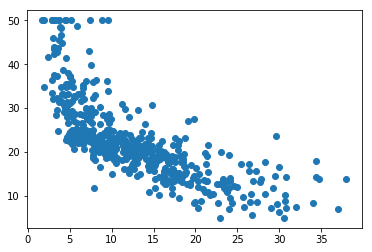

In [13]:
plt.scatter(lstat, y)
plt.show()

In [0]:
# ホールドアウト法でデータを学習用とテスト用に分割する
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(lstat, y, test_size=0.3, random_state=0)
# random_state=0でチュートリアルと同等の結果を得る



```
ホールドアウト法
データのテスト手法の一種。
教師データ（訓練データ）を、あらかじめ学習用と評価用に分割(上で言うtest_size)しておき、学習させたモデルを評価データで把握し、モデルの精度を確かめる方法のこと。
```



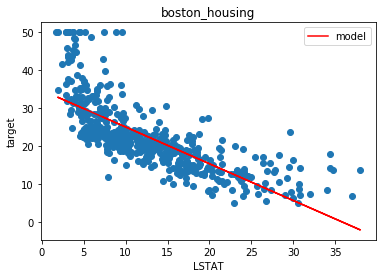

In [20]:
from sklearn.linear_model import LinearRegression
# 線形モデルをインスタンス化
lr = LinearRegression()
# 学習用のデータで学習
lr.fit(X_train, y_train)

# matplotlib scatterは散布図
plt.scatter(lstat, y)
# plotは線
plt.plot(X_test, lr.predict(X_test),label="model", color='red')
# legendは凡例(plotでラベルを指定する必要あり)
plt.legend()
plt.title('boston_housing')
plt.xlabel('LSTAT')
plt.ylabel('target')
plt.show()

単回帰モデルを作成できた
→　LSTATがわかればtargetを推測できる

以下、二条平均平方根誤差（Root Mean Squared Error/RMSE）、決定係数(Coefficient of Determination) という評価指標で予測モデルの良し悪しを検討する。

In [21]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

from math import sqrt
from sklearn.metrics import mean_squared_error
# RMSEを算出
print('RMSE Test :' + str((sqrt(mean_squared_error(y_test, y_test_pred)))))
# 学習用、テスト用それぞれに対してR^2を出力(回帰モデルならscoreを使えば決定係数が得られる)
print('R^2 Train: %.3f, TEST: %.3f'%(lr.score(X_train, y_train), lr.score(X_test, y_test)))



RMSE Test :6.310083240714354
R^2 Train: 0.552, TEST: 0.522





**決定係数**は、0～1の範囲の値をとり、1に近いほど精度の高いモデル。

**RMSE**は、予測と正解の平均的なズレを表す。今回は平均的に約6.3のズレがあることを示す。
